<a href="https://colab.research.google.com/github/respwill/Abalone_age_regression/blob/main/Model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load preprocessed data
Load data that I already performed preprocessing and engineering.  

In [ ]:
import pandas as pd
import pickle
import requests
import numpy as np
import math

In [ ]:
url = 'https://raw.githubusercontent.com/respwill/Abalone_age_regression/main/preprocessed_abalone2.pickle'
df = pd.read_pickle(url)

In [ ]:
df.head()

,Sex,Length,Height,Whole_weight,A_I,A,Diameter / Height,Diameter / Length,Diameter / Shell_weight,Diameter / Shucked_weight,...,Length_to_avg_Length_age_6,Length_to_avg_Length_age_7,Length_to_avg_Length_age_8,Length_to_avg_Length_age_9,Length_to_avg_Length_age_10,Length_to_avg_Length_age_11,Length_to_avg_Length_age_12,Length_to_avg_Length_age_13,Length_to_avg_Length_age_14,Length_to_avg_Length_age_15
0,M,0.455,0.095,0.5140,A,True,3.842105,0.802198,2.433333,1.625835,...,1.222197,1.075871,0.909983,0.829898,0.790115,0.759207,0.770078,0.787279,0.784214,0.789245
1,M,0.350,0.090,0.2255,A,True,2.944444,0.757143,3.785714,2.663317,...,0.940152,0.827593,0.699987,0.638383,0.607781,0.584005,0.592368,0.605600,0.603242,0.607112
2,F,0.530,0.135,0.6770,A,True,3.111111,0.792453,2.000000,1.637427,...,1.423658,1.253212,1.059980,0.966694,0.920353,0.884351,0.897014,0.917051,0.913481,0.919341
3,M,0.440,0.125,0.5160,A,True,2.920000,0.829545,2.354839,1.693735,...,1.181905,1.040402,0.879984,0.802539,0.764067,0.734178,0.744691,0.761325,0.758361,0.763226
4,I,0.330,0.080,0.2050,I,False,3.187500,0.772727,4.636364,2.849162,...,0.886429,0.780302,0.659988,0.601904,0.573050,0.550634,0.558518,0.570994,0.568771,0.572420


In [ ]:
X = df.drop(['age','Sex', 'A_I', 'ring'], axis=1)
y = df['ring']

The final dataset has 3754 records and 68 features.  

In [ ]:
X.shape

(3754, 68)

# Feature selection  
There are some techniques to select features such as Variancethreshold, Kbest, RFE, feature importance of Randomforest model.  
I will take features by each techniques and save each features set to test if what technique shows the best result on base models.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remove features that is variance is lower than VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
var_x = selector.fit_transform(X)
var_x = selector.get_feature_names_out()
var_x.shape

(56,)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features using SelectKBest
k_best = SelectKBest(score_func=f_regression, k=56)
kbest_x = k_best.fit_transform(X, y)
kbest_x = k_best.get_feature_names_out()
kbest_x.shape

(56,)

In [ ]:
y.shape

(3754,)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Select features using RFE
# model = LinearRegression()
model = GradientBoostingRegressor(random_state=42)
# model = SVR(kernel='linear')
rfe = RFE(model, n_features_to_select=56)
rfe_x = rfe.fit_transform(X, y.to_numpy().reshape(-1,))

# 선택된 특성 확인
rfe_x = X.columns[rfe.support_]
print("Selected Features: ", rfe_x)


Selected Features:  Index(['Whole_weight', 'A', 'Diameter / Height', 'Diameter / Length',
       'Diameter / Shell_weight', 'Diameter / Shucked_weight',
       'Diameter / Viscera_weight', 'Height / Length',
       'Shell_weight / Shucked_weight', 'Shell_weight / Viscera_weight',
       'Shell_weight / Whole_weight', 'Shucked_weight / Shell_weight',
       'Shucked_weight / Viscera_weight', 'Shucked_weight / Whole_weight',
       'Viscera_weight / Shell_weight', 'Viscera_weight / Shucked_weight',
       'Viscera_weight / Whole_weight', 'Diameter - Length',
       'Diameter - Shell_weight', 'Diameter - Viscera_weight',
       'Length - Shell_weight', 'Length - Viscera_weight',
       'Shell_weight - Shucked_weight', 'Shell_weight - Viscera_weight',
       'Height_to_avg_Height_age_3', 'Height_to_avg_Height_age_5',
       'Height_to_avg_Height_age_6', 'Height_to_avg_Height_age_7',
       'Height_to_avg_Height_age_8', 'Height_to_avg_Height_age_9',
       'Height_to_avg_Height_age_12', 'He

In [ ]:
from sklearn.ensemble import RandomForestRegressor
importances = RandomForestRegressor().fit(X, y).feature_importances_

# 중요도 순으로 특성을 정렬하여 상위 특성을 선택
feature_importance = pd.Series(importances, index=X.columns)
top_features = feature_importance.nlargest(56).index
importance_x = X[top_features]
importance_x = top_features

print("Top Features: ", top_features)

Top Features:  Index(['Diameter / Shell_weight', 'Shucked_weight / Whole_weight',
       'Length - Shell_weight', 'Diameter / Length', 'Height / Length', 'A',
       'Shell_weight / Whole_weight', 'Diameter / Height',
       'Diameter - Shell_weight', 'Whole_weight', 'Length - Viscera_weight',
       'Shell_weight - Viscera_weight', 'Viscera_weight / Whole_weight',
       'Diameter / Viscera_weight', 'Diameter - Viscera_weight',
       'Diameter / Shucked_weight', 'Viscera_weight / Shucked_weight',
       'Shell_weight - Shucked_weight', 'Shucked_weight / Viscera_weight',
       'Shucked_weight / Shell_weight', 'Shell_weight / Shucked_weight',
       'Shell_weight / Viscera_weight', 'Viscera_weight / Shell_weight',
       'Diameter - Length', 'Diameter_to_avg_Diameter_age_2',
       'Diameter_to_avg_Diameter_age_15', 'Diameter_to_avg_Diameter_age_5',
       'Diameter_to_avg_Diameter_age_14', 'Diameter_to_avg_Diameter_age_11',
       'Diameter_to_avg_Diameter_age_3', 'Diameter_to_avg_Di

In [ ]:
# X_r = X[["Diameter", 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight','Shell_weight','weight_diff','I','Without_Shell_weight']]
# X_r = X[['Length','Diameter','Height',, 'Shell_weight', 'Shucked_ratio']]

datasets = {'variance':var_x, 'K best': kbest_x, 'REF': rfe_x, 'Feature importance':importance_x}
y = df[['ring']]

In [ ]:
y.shape

(3754, 1)

# Feature and model combination
I will run train and test loop through all dataset and model candidates.  
And select the best combination among them.  
The metrics to evaluate the combination is RMSLE.  
It measures relative difference between label and prediction.  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, BayesianRidge
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
best_combination = []
best_rmsle = 1
for model in [RandomForestRegressor(random_state=42), LinearRegression(), SGDRegressor(), Lasso(), BayesianRidge(), SGDRegressor(), SVR(),
              DecisionTreeRegressor(random_state=42), GradientBoostingRegressor(random_state=42), AdaBoostRegressor(random_state=42), XGBRegressor()]:

              for k,d in datasets.items():
                # if k != 'REF':continue
                X_train, X_test, y_train, y_test = train_test_split(X[d], y['ring'], test_size=0.2, random_state=42)
                pipe = make_pipeline(MinMaxScaler(), model)
                pipe.fit(X_train, y_train)
                score = pipe.score(X_test, y_test)
                pred = pipe.predict(X_test)
                try:
                    rmsle = np.sqrt(mean_squared_log_error(y_test, pred))
                except:
                    rmsle = 1
                if rmsle < best_rmsle:
                  best_rmsle = rmsle
                  best_combination = [k, list(pipe.named_steps.keys())[1]]
                  print("The best one so far:")
                  print(list(pipe.named_steps.keys())[1])
                  print(f"R^2 of {k}:", score)
                  print(f"RMSLE of {k}:", rmsle)
                  print("\n")

The best one so far:
randomforestregressor
R^2 of variance: 0.4898457326408826
RMSLE of variance: 0.1571110215806977


The best one so far:
randomforestregressor
R^2 of K best: 0.5073410789983788
RMSLE of K best: 0.15432730136636727


The best one so far:
randomforestregressor
R^2 of REF: 0.5213903343813152
RMSLE of REF: 0.1524778391022854


The best one so far:
randomforestregressor
R^2 of Feature importance: 0.520045315584263
RMSLE of Feature importance: 0.15238405727073184


The best one so far:
svr
R^2 of variance: 0.5120567867914843
RMSLE of variance: 0.1523427917310202


The best one so far:
svr
R^2 of K best: 0.524878572459724
RMSLE of K best: 0.1507453183628628




# Model selection
I ran above loop several times and found out that Gradientboosting regression model and SVR models shows the best score on default settings.  
Features are good when they are selected by Kbest or RFE.  
Each results could be better if their parameter is optimized.  
I will use optuna package to test its best parameter combinations.  
Also, eventhough I already removed highly correlated features, to prevent collinearity I added PCA procees in pipe line.  

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
best_combination

['K best', 'svr']

In [ ]:
d = datasets[best_combination[0]]
d = datasets['K best']
X_train, X_test, y_train, y_test = train_test_split(X[d], y['ring'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import make_scorer

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

## GradientBoostingRegressor optimization

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    pca_components = trial.suggest_int('pca_components', 5, min(X_train.shape[1], 20))

    # Create a pipeline with PCA and SVR
    pipeline = Pipeline([
        ('scaler', StandardScaler()), # Feature scaling
        ('pca', PCA(n_components=pca_components)), # Dimensionality reduction
        ('gbr', GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42)
        )
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=5, n_jobs=-1, scoring=rmsle_scorer)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=600)

# Best parameters found
print("Best parameters:", study.best_params)

# Best score
print("Best score:", study.best_value)

[I 2024-06-13 04:59:45,850] A new study created in memory with name: no-name-e055183c-c5ad-41c8-bf52-0faa7b23d3af
[I 2024-06-13 05:00:20,639] Trial 0 finished with value: -0.14789395236460612 and parameters: {'n_estimators': 207, 'learning_rate': 0.021415969872079024, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 16, 'pca_components': 14}. Best is trial 0 with value: -0.14789395236460612.
[I 2024-06-13 05:00:47,121] Trial 1 finished with value: -0.15236132059559576 and parameters: {'n_estimators': 163, 'learning_rate': 0.07878297751929926, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 1, 'pca_components': 18}. Best is trial 0 with value: -0.14789395236460612.
[I 2024-06-13 05:01:57,392] Trial 2 finished with value: -0.15059144123594415 and parameters: {'n_estimators': 483, 'learning_rate': 0.034501198237836685, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 7, 'pca_components': 19}. Best is trial 0 with value: -0.14789395236460612.
[I 2024-0

Best parameters: {'n_estimators': 188, 'learning_rate': 0.028724703550025273, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 6, 'pca_components': 17}
Best score: -0.14396531448746788


In [ ]:
trial = study.best_trial
best_params = trial.params
# best_params = {'n_estimators': 409, 'learning_rate': 0.020184707972627617, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 15, 'pca_components': 10}
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_params['pca_components'])),
    ('svr', GradientBoostingRegressor(n_estimators = best_params['n_estimators'],
                                      learning_rate = best_params['learning_rate'],
                                        max_depth = best_params['max_depth'],
                                        min_samples_split = best_params['min_samples_split'],
                                        min_samples_leaf = best_params['min_samples_leaf']
                                ))])
final_pipeline.fit(X_train, y_train)
prediction = final_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
rmsle = np.sqrt(mean_squared_log_error(y_test, prediction))

In [ ]:
rmse, rmsle

(1.6559043739279222, 0.15295413352445364)

Pre

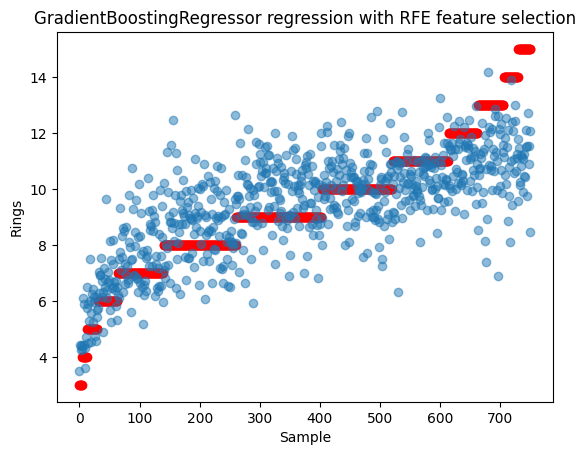

In [ ]:
import matplotlib.pyplot as plt
results = {'act':y_test, 'pred':prediction}
results = pd.DataFrame(results).sort_values(by='act')
plt.scatter(range(len(y_test)), results['act'], c='r', label='Actual')
plt.scatter(range(len(y_test)), results['pred'], label='Pred', alpha=0.5)
plt.title("GradientBoostingRegressor regression with RFE feature selection")
plt.ylabel("Rings")
plt.xlabel("Sample")
plt.show()

## SVR optimization

In [ ]:
def objective(trial):
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    epsilon = trial.suggest_float('epsilon', 1e-3, 1, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    pca_components = trial.suggest_int('pca_components', 5, min(X_train.shape[1], 20))

    # Create a pipeline with PCA and SVR
    pipeline = Pipeline([
        ('scaler', StandardScaler()), # Feature scaling
        ('pca', PCA(n_components=pca_components)), # Dimensionality reduction
        ('svr', SVR(C=C, epsilon=epsilon, kernel=kernel))
    ])

    # Create SVR model
    # model = SVR(C=C, epsilon=epsilon, kernel=kernel)
    score = cross_val_score(pipeline, X_train, y_train, cv=5, n_jobs=-1, scoring=rmsle_scorer)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=600)

# Best parameters found
print("Best parameters:", study.best_params)

# Best score
print("Best score:", study.best_value)


[I 2024-06-13 07:36:33,944] A new study created in memory with name: no-name-ed9fb8ba-8ab3-4718-9f32-399fff192076
[I 2024-06-13 07:36:42,575] Trial 0 finished with value: -0.1632269657436946 and parameters: {'C': 1.361395220697637, 'epsilon': 0.01042385846666531, 'kernel': 'poly', 'pca_components': 18}. Best is trial 0 with value: -0.1632269657436946.
[I 2024-06-13 07:37:07,735] Trial 1 finished with value: -0.16113004008287896 and parameters: {'C': 23.298804276279046, 'epsilon': 0.0026976436446718597, 'kernel': 'poly', 'pca_components': 9}. Best is trial 1 with value: -0.16113004008287896.
[I 2024-06-13 07:37:10,290] Trial 2 finished with value: -7.769580985614691 and parameters: {'C': 461.92761880280455, 'epsilon': 0.8850329957564738, 'kernel': 'sigmoid', 'pca_components': 10}. Best is trial 1 with value: -0.16113004008287896.
[I 2024-06-13 07:37:12,798] Trial 3 finished with value: -0.16625446720216647 and parameters: {'C': 2.47424802178863, 'epsilon': 0.8743598537187666, 'kernel': 

Best parameters: {'C': 5.239814903831319, 'epsilon': 0.9750219925543229, 'kernel': 'rbf', 'pca_components': 9}
Best score: -0.14315437056377897


In [ ]:
trial = study.best_trial
best_params = trial.params
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_params['pca_components'])),
    ('svr', SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel']))
])
final_pipeline.fit(X_train, y_train)
prediction = final_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
rmsle = np.sqrt(mean_squared_log_error(y_test, prediction))

In [ ]:
rmse, rmsle

(1.6268095955400472, 0.15196920219225413)

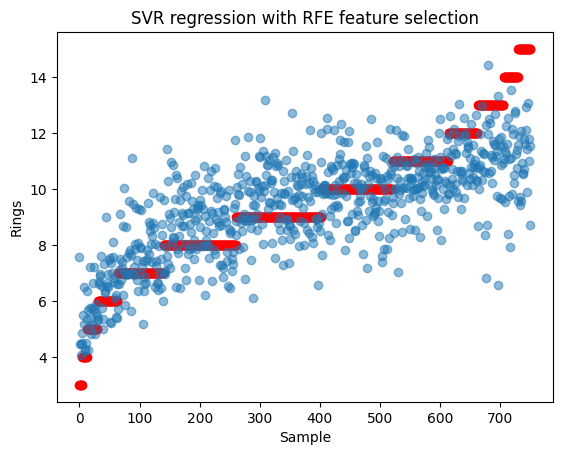

In [ ]:
import matplotlib.pyplot as plt
results = {'act':y_test, 'pred':prediction}
results = pd.DataFrame(results).sort_values(by='act')
plt.scatter(range(len(y_test)), results['act'], c='r', label='Actual')
plt.scatter(range(len(y_test)), results['pred'], label='Pred', alpha=0.5)
plt.title("SVR regression with RFE feature selection")
plt.ylabel("Rings")
plt.xlabel("Sample")
plt.show()

# Result summary  
Results from conbination that I tested after optimized the model.  

|Model                    |Dataselection|RMSE |RMSLE|Iteration|
|-------------------------|-------------|-----|-----|---------|
|SVR                      | None        |1.657|0.156|300|
|GradientBoostingRegressor| RFE(SVR)    |1.648|0.155|300|
|SVR                      | RFE         |1.640|0.152|300|
|GradientBoostingRegressor| RFE(GB)     |1.626|0.150|300|
|GradientBoostingRegressor| K best      |1.621|0.150|300|



# Discution/Conclusion
I've tried to fit SVR and GradientBoosting model to the dataset.  
I've tuned hyper-parameter of each model as much as possible,  
and the best result I got is **RMSLE 0.150**.  

From the visualization above, the model mostly failed to predict rings above 14.  

It is becuase the many features such as length, diameter, height  
have strong correlation to number of rings when the ring is under 14, but above 14.    

I tried to find some features that are helpful to predict ring over 14, but coudln't.  
For the future step, I would focus on data engineering to find out features.  
